<a href="https://colab.research.google.com/gist/NeDa-Y/d693918235d0d053831adb4bad3c6390/copy-of-dl_nedayousefi_cifarproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Improving CNN for Cfar**

# **First Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 6s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

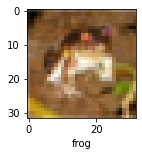

In [ ]:
plot_sample(X_train, y_train, 0)

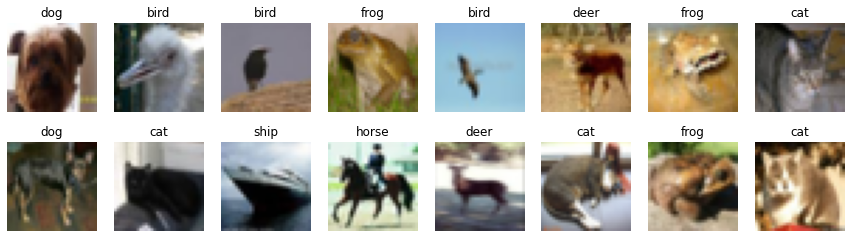

In [ ]:
# show random images from train
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_train[random_index, :])
        ax.set_title(classes[y_train[random_index]])
plt.show()

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#defining a simple CNN model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 13s 4ms/step - loss: 1.4872 - accuracy: 0.4646
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1395 - accuracy: 0.6001
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0095 - accuracy: 0.6482
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9255 - accuracy: 0.6775
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8627 - accuracy: 0.7011
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8053 - accuracy: 0.7207
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7587 - accuracy: 0.7342
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7184 - accuracy: 0.7511
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6794 - accuracy: 0.7638
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.64

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1802 - accuracy: 0.6913


[1.1801611185073853, 0.6912999749183655]

# **The first simple model achieved following results:**
#**First Model Results**
# **Train accuracy: 0.8732**
# **Test accuracy: 0.6912**

# **Second Model**

# **Since the first model achived the bad result both in training and validating dataset so we should solve the problem of high bias/underfitting and also high variance/over fitting**

# **For solving the problem of high bais/underfitting and in other words the problem of low training accuracy, we can use more training time, different structural model**

# **For solving the problem of high variance/overfitting and in other words the problem of low generalization/ low val/test accuracy, we can use Regularization, Dropout,more data, different structural model**

# **As per above mentioned, I used: Batch Normalization, Maxpooling, and longer training time(100 epoch)**

In [ ]:
import tensorflow as tf
import numpy as np                                
import matplotlib.pyplot as plt
import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
import h5py
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras import datasets, layers, models
from keras import datasets, layers, models

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()


In [ ]:
#reshape into images
img_rows, img_cols , channels= 32,32,3
x_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, channels)
x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, channels)
input_shape = (img_rows, img_cols, 1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
#convert integers to float; normalise and center the mean
x_train=x_train.astype("float32")  
x_test=x_test.astype("float32")
mean=np.mean(x_train)
std=np.std(x_train)
x_test=(x_test-mean)/std
x_train=(x_train-mean)/std

In [ ]:
# labels
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
reg=None
num_filters=32
ac='relu'
adm=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt=adm
drop_dense=0.5
drop_conv=0

model2 = Sequential()

model2.add(Conv2D(num_filters, (3, 3), activation=ac, kernel_regularizer=reg, input_shape=(img_rows, img_cols, channels),padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model2.add(Dropout(drop_conv))

model2.add(Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model2.add(Dropout(drop_conv))

model2.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model2.add(Dropout(drop_conv))

model2.add(Flatten())
model2.add(Dense(512, activation=ac,kernel_regularizer=reg))
model2.add(BatchNormalization())
model2.add(Dropout(drop_dense))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [ ]:
# training 
history=model2.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
391/391 [==============================] - 9s 19ms/step - loss: 1.4576 - accuracy: 0.5205 - val_loss: 1.2281 - val_accuracy: 0.5615
Epoch 2/100
391/391 [==============================] - 7s 18ms/step - loss: 0.8705 - accuracy: 0.6962 - val_loss: 0.8640 - val_accuracy: 0.7116
Epoch 3/100
391/391 [==============================] - 7s 18ms/step - loss: 0.6811 - accuracy: 0.7619 - val_loss: 0.7063 - val_accuracy: 0.7593
Epoch 4/100
391/391 [==============================] - 7s 18ms/step - loss: 0.5588 - accuracy: 0.8038 - val_loss: 0.7268 - val_accuracy: 0.7627
Epoch 5/100
391/391 [==============================] - 7s 17ms/step - loss: 0.4732 - accuracy: 0.8357 - val_loss: 0.6814 - val_accuracy: 0.7723
Epoch 6/100
391/391 [==============================] - 7s 18ms/step - loss: 0.3880 - accuracy: 0.8634 - val_loss: 0.6876 - val_accuracy: 0.7837
Epoch 7/100
391/391 [==============================] - 7s 18ms/step - loss: 0.3233 - accuracy: 0.8877 - val_loss: 0.6586 - val_accuracy:

In [ ]:
#training accuracy 
train_acc=model2.evaluate(x_train,y_train,batch_size=128)
train_acc

391/391 [==============================] - 2s 6ms/step - loss: 0.0047 - accuracy: 0.9983


[0.004668953828513622, 0.9982600212097168]

In [ ]:
model2_test_acc=model2.evaluate(x_test,y_test,batch_size=128)
model2_test_acc

79/79 [==============================] - 1s 7ms/step - loss: 1.3148 - accuracy: 0.8222


[1.3147509098052979, 0.8222000002861023]

# **By using Batch Normalization, Maxpooling, and longer training time(100 epoch), the result of model 2 is:**

# **Second Model results:**

# **Training Accuracy: 0.9983**
# **Test Accuracy: 0.8222**

# **The result of second model shows that training accuracy is pretty well and the problem of high bias/ underfitting is completly solved, and also the Test accuracy is getteing much better.**


# **Third Model**

# **In the third model we should just focus on improving the val/ test accuracy by using Regularization, Dropout, Data augmentation**

# **In this model I add L2 regularization, Data augmentation**

In [ ]:
import tensorflow as tf
import numpy as np                                
import matplotlib.pyplot as plt
import keras as k
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
import h5py
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras import datasets, layers, models

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()


In [ ]:
#reshape into images
img_rows, img_cols , channels= 32,32,3
x_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, channels)
x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, channels)
input_shape = (img_rows, img_cols, 1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
#convert integers to float; normalise and center the mean
x_train=x_train.astype("float32")  
x_test=x_test.astype("float32")
mean=np.mean(x_train)
std=np.std(x_train)
x_test=(x_test-mean)/std
x_train=(x_train-mean)/std

# labels
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
reg2=l2(1e-4)   # L2 or "ridge" regularisation
num_filters2=32
ac2='relu'
adm2=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt2=adm2
drop_dense2=0.5
drop_conv2=0

model3 = Sequential()

model3.add(Conv2D(num_filters2, (3, 3), activation=ac2, kernel_regularizer=reg2, input_shape=(img_rows, img_cols, channels),padding='same'))
model3.add(BatchNormalization(axis=-1))
model3.add(Conv2D(num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model3.add(BatchNormalization(axis=-1))
model3.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model3.add(Dropout(drop_conv2))

model3.add(Conv2D(2*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model3.add(BatchNormalization(axis=-1))
model3.add(Conv2D(2*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model3.add(BatchNormalization(axis=-1))
model3.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model3.add(Dropout(drop_conv2))

model3.add(Conv2D(4*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model3.add(BatchNormalization(axis=-1))
model3.add(Conv2D(4*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model3.add(BatchNormalization(axis=-1))
model3.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model3.add(Dropout(drop_conv2))

model3.add(Flatten())
model3.add(Dense(512, activation=ac2,kernel_regularizer=reg2))
model3.add(BatchNormalization())
model3.add(Dropout(drop_dense2))
model3.add(Dense(num_classes, activation='softmax'))

model3.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt2)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
train_datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest")

test_datagen = ImageDataGenerator()

In [ ]:
batch_size = 128

In [ ]:
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)
valid_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)
test_generator = test_datagen.flow(x_test, batch_size=1)

In [ ]:
# set up image augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
datagen.fit(x_train)

In [ ]:
# train with image augmentation
history3=model3.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                    steps_per_epoch = len(x_train) / 128, epochs=100, validation_data=(x_test, y_test))

<ipython-input-50-07459da9308f>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3=model3.fit_generator(datagen.flow(x_train, y_train, batch_size=128),


Epoch 1/100
390/390 [==============================] - 35s 85ms/step - loss: 1.7944 - accuracy: 0.4493 - val_loss: 1.2979 - val_accuracy: 0.5804
Epoch 2/100
390/390 [==============================] - 30s 76ms/step - loss: 1.2251 - accuracy: 0.6125 - val_loss: 1.1826 - val_accuracy: 0.6493
Epoch 3/100
390/390 [==============================] - 38s 99ms/step - loss: 1.0327 - accuracy: 0.6840 - val_loss: 1.2508 - val_accuracy: 0.6561
Epoch 4/100
390/390 [==============================] - 32s 81ms/step - loss: 0.9302 - accuracy: 0.7217 - val_loss: 0.8919 - val_accuracy: 0.7460
Epoch 5/100
390/390 [==============================] - 35s 91ms/step - loss: 0.8554 - accuracy: 0.7498 - val_loss: 0.9327 - val_accuracy: 0.7494
Epoch 6/100
390/390 [==============================] - 31s 78ms/step - loss: 0.8010 - accuracy: 0.7717 - val_loss: 0.8240 - val_accuracy: 0.7718
Epoch 7/100
390/390 [==============================] - 30s 76ms/step - loss: 0.7665 - accuracy: 0.7853 - val_loss: 0.7697 - val_ac

In [ ]:
model3_train_acc=model3.evaluate(x_train,y_train,batch_size=128)
model3_train_acc

391/391 [==============================] - 2s 6ms/step - loss: 0.4588 - accuracy: 0.9316


[0.45882508158683777, 0.9315800070762634]

In [ ]:
model3_test_acc=model3.evaluate(x_test,y_test,batch_size=128)
model3_test_acc

79/79 [==============================] - 1s 7ms/step - loss: 0.6624 - accuracy: 0.8731


[0.6623848080635071, 0.8730999827384949]

# **By adding L2 regularization and Data augmentation, the results are as follows**
#**The results for Third Model are:**
#**Training Accuracy: 0.9315**
#**Test Accuracy: 0.8730**

# **Fourth Model**

# **In Fourth Model, I add Dropout and all the previous model is unchanged**

In [ ]:
reg2=None
num_filters2=32
ac2='relu'
adm2=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt2=adm2
drop_dense2=0.5
drop_conv2=0.1

model4 = Sequential()

model4.add(Conv2D(num_filters2, (3, 3), activation=ac2, kernel_regularizer=reg2, input_shape=(img_rows, img_cols, channels),padding='same'))
model4.add(BatchNormalization(axis=-1))
model4.add(Conv2D(num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model4.add(BatchNormalization(axis=-1))
model4.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model4.add(Dropout(drop_conv2))

model4.add(Conv2D(2*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model4.add(BatchNormalization(axis=-1))
model4.add(Conv2D(2*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model4.add(BatchNormalization(axis=-1))
model4.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model4.add(Dropout(drop_conv2))

model4.add(Conv2D(4*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model4.add(BatchNormalization(axis=-1))
model4.add(Conv2D(4*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model4.add(BatchNormalization(axis=-1))
model4.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model4.add(Dropout(drop_conv2))

model4.add(Flatten())
model4.add(Dense(512, activation=ac2,kernel_regularizer=reg2))
model4.add(BatchNormalization())
model4.add(Dropout(drop_dense2))
model4.add(Dense(num_classes, activation='softmax'))

model4.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt2)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
train_datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest")

test_datagen = ImageDataGenerator()

In [ ]:
batch_size = 128

In [ ]:
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)
valid_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)
test_generator = test_datagen.flow(x_test, batch_size=1)

In [ ]:
# set up image augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
datagen.fit(x_train)

In [ ]:
# train with image augmentation
history4=model4.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                    steps_per_epoch = len(x_train) / 128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100


<ipython-input-63-28d7e4481e69>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history4=model4.fit_generator(datagen.flow(x_train, y_train, batch_size=128),


390/390 [==============================] - 32s 80ms/step - loss: 1.6568 - accuracy: 0.4526 - val_loss: 1.1757 - val_accuracy: 0.5766
Epoch 2/100
390/390 [==============================] - 31s 79ms/step - loss: 1.0739 - accuracy: 0.6214 - val_loss: 0.9419 - val_accuracy: 0.6778
Epoch 3/100
390/390 [==============================] - 31s 78ms/step - loss: 0.8761 - accuracy: 0.6929 - val_loss: 0.8096 - val_accuracy: 0.7220
Epoch 4/100
390/390 [==============================] - 29s 74ms/step - loss: 0.7702 - accuracy: 0.7286 - val_loss: 0.9161 - val_accuracy: 0.7016
Epoch 5/100
390/390 [==============================] - 30s 76ms/step - loss: 0.7000 - accuracy: 0.7564 - val_loss: 0.8219 - val_accuracy: 0.7249
Epoch 6/100
390/390 [==============================] - 29s 74ms/step - loss: 0.6454 - accuracy: 0.7772 - val_loss: 0.6362 - val_accuracy: 0.7898
Epoch 7/100
390/390 [==============================] - 29s 74ms/step - loss: 0.6092 - accuracy: 0.7878 - val_loss: 0.5583 - val_accuracy: 0.81

In [ ]:
model4_train_acc=model4.evaluate(x_train,y_train,batch_size=128)
model4_train_acc

391/391 [==============================] - 2s 6ms/step - loss: 0.0658 - accuracy: 0.9774


[0.06581171602010727, 0.977400004863739]

In [ ]:
model4_test_acc=model4.evaluate(x_test,y_test,batch_size=128)
model4_test_acc

79/79 [==============================] - 1s 7ms/step - loss: 0.4019 - accuracy: 0.8910


[0.40191560983657837, 0.890999972820282]

# **By adding L2 regularization, Data augmentation, dropout, batch Normalization and 100 Epoch of training in to the first model, the Fourth model achieved the following results:**

## **Fourth Model Results**

# **Training accuracy: 0.9774**
# **Test accuracy: 0.891**

# **Fifth Model**

# **In fifth Model, I tried to change the optimizer from "ADAM" to "RMSprop" All the remaining of model Unchanged**

In [ ]:
#reg2=l2(1e-4)   # L2 or "ridge" regularisation
reg2=None
num_filters2=32
ac2='relu'
adm2=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt2=adm2
drop_dense2=0.5
drop_conv2=0

model5 = Sequential()

model5.add(Conv2D(num_filters2, (3, 3), activation=ac2, kernel_regularizer=reg2, input_shape=(img_rows, img_cols, channels),padding='same'))
model5.add(BatchNormalization(axis=-1))
model5.add(Conv2D(num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model5.add(BatchNormalization(axis=-1))
model5.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model5.add(Dropout(drop_conv2))

model5.add(Conv2D(2*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model5.add(BatchNormalization(axis=-1))
model5.add(Conv2D(2*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model5.add(BatchNormalization(axis=-1))
model5.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model5.add(Dropout(drop_conv2))

model5.add(Conv2D(4*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model5.add(BatchNormalization(axis=-1))
model5.add(Conv2D(4*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model5.add(BatchNormalization(axis=-1))
model5.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model5.add(Dropout(drop_conv2))

model5.add(Flatten())
model5.add(Dense(512, activation=ac2,kernel_regularizer=reg2))
model5.add(BatchNormalization())
model5.add(Dropout(drop_dense2))
model5.add(Dense(num_classes, activation='softmax'))

model5.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='RMSprop')

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
train_datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest")

test_datagen = ImageDataGenerator()

In [ ]:
batch_size=128
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)
valid_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)
test_generator = test_datagen.flow(x_test, batch_size=1)

In [ ]:
# set up image augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
datagen.fit(x_train)

In [ ]:
# train 
history5=model5.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                    steps_per_epoch = len(x_train) / 128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100


<ipython-input-71-69e5db199422>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history5=model5.fit_generator(datagen.flow(x_train, y_train, batch_size=128),


390/390 [==============================] - 42s 103ms/step - loss: 1.6558 - accuracy: 0.4625 - val_loss: 1.0797 - val_accuracy: 0.6130
Epoch 2/100
390/390 [==============================] - 30s 76ms/step - loss: 1.0353 - accuracy: 0.6436 - val_loss: 1.0021 - val_accuracy: 0.6742
Epoch 3/100
390/390 [==============================] - 29s 75ms/step - loss: 0.8306 - accuracy: 0.7116 - val_loss: 0.7521 - val_accuracy: 0.7476
Epoch 4/100
390/390 [==============================] - 37s 95ms/step - loss: 0.7292 - accuracy: 0.7469 - val_loss: 0.7238 - val_accuracy: 0.7574
Epoch 5/100
390/390 [==============================] - 40s 101ms/step - loss: 0.6570 - accuracy: 0.7735 - val_loss: 0.6132 - val_accuracy: 0.7947
Epoch 6/100
390/390 [==============================] - 34s 88ms/step - loss: 0.6130 - accuracy: 0.7907 - val_loss: 0.6945 - val_accuracy: 0.7822
Epoch 7/100
390/390 [==============================] - 40s 101ms/step - loss: 0.5637 - accuracy: 0.8063 - val_loss: 0.6193 - val_accuracy: 0

In [ ]:
model5_train_acc=model5.evaluate(x_train,y_train,batch_size=128)
model5_train_acc

391/391 [==============================] - 2s 6ms/step - loss: 0.0858 - accuracy: 0.9708


[0.08584918081760406, 0.9707599878311157]

In [ ]:
model5_test_acc=model5.evaluate(x_test,y_test,batch_size=128)
model5_test_acc

79/79 [==============================] - 1s 7ms/step - loss: 0.4302 - accuracy: 0.8932


[0.4302097260951996, 0.8931999802589417]

# **By using Regularization, Data Augmentation, Dropout, More training(100 Epoch), Batch Normalization, and RMSprop, The results are as follows:**
#**Training Accuracy:0.97**
#**Test Accuracy:0.8932**

# **The Results are nearly same as using all features by applying ADAM optimizer**

# **So, by now, I should focus on different Nn structure, learning rate, Weight Decay, Different batch size, Momentum, Different Augmentation parameters and These Kind of parameters for observing the results by changing them**

# **The Sixth model**

# **Defining Sixth model by different parameters and Some changes in previous Models as follows**

In [ ]:
import inspect
from collections import namedtuple, defaultdict
from functools import partial
import functools
from itertools import chain, count, islice as take

#####################
## dict utils
#####################

union = lambda *dicts: {k: v for d in dicts for (k, v) in d.items()}

make_tuple = lambda path: (path,) if isinstance(path, str) else path

def path_iter(nested_dict, pfx=()):
    for name, val in nested_dict.items():
        if isinstance(val, dict): yield from path_iter(val, pfx+make_tuple(name))
        else: yield (pfx+make_tuple(name), val)  
            
map_values = lambda func, dct: {k: func(v) for k,v in dct.items()}

def map_nested(func, nested_dict):
    return {k: map_nested(func, v) if isinstance(v, dict) else func(v) for k,v in nested_dict.items()}

def group_by_key(seq):
    res = defaultdict(list)
    for k, v in seq: 
        res[k].append(v) 
    return res

reorder = lambda dct, keys: {k: dct[k] for k in keys}

#####################
## graph building
#####################

def identity(value): return value

def build_graph(net, path_map='_'.join):
    net = {path: node if len(node) is 3 else (*node, None) for path, node in path_iter(net)}
    default_inputs = chain([('input',)], net.keys())
    resolve_path = lambda path, pfx: pfx+path if (pfx+path in net or not pfx) else resolve_path(net, path, pfx[:-1])
    return {path_map(path): (typ, value, ([path_map(default)] if inputs is None else [path_map(resolve_path(make_tuple(k), path[:-1])) for k in inputs])) 
            for (path, (typ, value, inputs)), default in zip(net.items(), default_inputs)}

#####################
## network visualisation 
#####################
import IPython.display

class ColorMap(dict):
    palette = (
        'bebada,ffffb3,fb8072,8dd3c7,80b1d3,fdb462,b3de69,fccde5,bc80bd,ccebc5,ffed6f,1f78b4,33a02c,e31a1c,ff7f00,'
        '4dddf8,e66493,b07b87,4e90e3,dea05e,d0c281,f0e189,e9e8b1,e0eb71,bbd2a4,6ed641,57eb9c,3ca4d4,92d5e7,b15928'
    ).split(',')
 
    def __missing__(self, key):
        self[key] = self.palette[len(self) % len(self.palette)]
        return self[key]

def make_pydot(nodes, edges, direction='LR', sep='_', **kwargs):
    from pydot import Dot, Cluster, Node, Edge
    class Subgraphs(dict):
        def __missing__(self, path):
            *parent, label = path
            subgraph = Cluster(sep.join(path), label=label, style='rounded, filled', fillcolor='#77777744')
            self[tuple(parent)].add_subgraph(subgraph)
            return subgraph
    g = Dot(rankdir=direction, directed=True, **kwargs)
    g.set_node_defaults(
        shape='box', style='rounded, filled', fillcolor='#ffffff')
    subgraphs = Subgraphs({(): g})
    for path, attr in nodes:
        *parent, label = path.split(sep)
        subgraphs[tuple(parent)].add_node(
            Node(name=path, label=label, **attr))
    for src, dst, attr in edges:
        g.add_edge(Edge(src, dst, **attr))
    return g

class DotGraph():
    colors = ColorMap()   
    def __init__(self, graph, size=15, direction='LR'):
        self.nodes = [(k, {
            'tooltip': '%s %.1000r' % (typ, value), 
            'fillcolor': '#'+self.colors[typ],
        }) for k, (typ, value, inputs) in graph.items()] 
        self.edges = [(src, k, {}) for (k, (_,_,inputs)) in graph.items() for src in inputs]
        self.size, self.direction = size, direction

    def dot_graph(self, **kwargs):
        return make_pydot(self.nodes, self.edges, size=self.size, 
                            direction=self.direction, **kwargs)

    def svg(self, **kwargs):
        return self.dot_graph(**kwargs).create(format='svg').decode('utf-8')

    try:
        import pydot
        def _repr_svg_(self):
            return self.svg()
    except ImportError:
        def __repr__(self):
            return 'pydot is needed for network visualisation'


#####################
## Layers
##################### 

import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from collections import namedtuple
import copy

torch.backends.cudnn.benchmark = True
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
cpu = torch.device('cpu')
    
class Network(nn.Module):
    def __init__(self, net, loss=None):
        super().__init__()
        self.graph = {path: (typ, typ(**params), inputs) for path, (typ, params, inputs) in build_graph(net).items()}
        self.loss = loss or identity
        for path, (_,node,_) in self.graph.items(): 
            setattr(self, path, node)
    
    def nodes(self):
        return (node for _,node,_ in self.graph.values())
    
    def forward(self, inputs):
        outputs = dict(inputs)
        for k, (_, node, ins) in self.graph.items():
            outputs[k] = node(*[outputs[x] for x in ins])
        return outputs
    
    def half(self):
        for node in self.nodes():
            if isinstance(node, nn.Module) and not isinstance(node, nn.BatchNorm2d):
                node.half()
        return self

build_model = lambda network, loss: Network(network, loss).half().to(device)
show = lambda network, size=15: display(DotGraph(network.graph if isinstance(network, Network) else build_graph(network), size=size))
    
class Add(namedtuple('Add', [])):
    def __call__(self, x, y): return x + y 
    
class AddWeighted(namedtuple('AddWeighted', ['wx', 'wy'])):
    def __call__(self, x, y): return self.wx*x + self.wy*y 
    
class Identity(namedtuple('Identity', [])):
    def __call__(self, x): return x

class BatchNorm(nn.BatchNorm2d):
    def __init__(self, num_features, eps=1e-05, momentum=0.1, weight=True, bias=True):
        super().__init__(num_features, eps=eps, momentum=momentum)
        self.weight.data.fill_(1.0)
        self.bias.data.fill_(0.0)
        self.weight.requires_grad = weight
        self.bias.requires_grad = bias

class GhostBatchNorm(BatchNorm):
    def __init__(self, num_features, num_splits, **kw):
        super().__init__(num_features, **kw)
        self.num_splits = num_splits
        self.register_buffer('running_mean', torch.zeros(num_features*self.num_splits))
        self.register_buffer('running_var', torch.ones(num_features*self.num_splits))

    def train(self, mode=True):
        if (self.training is True) and (mode is False): #lazily collate stats when we are going to use them
            self.running_mean = torch.mean(self.running_mean.view(self.num_splits, self.num_features), dim=0).repeat(self.num_splits)
            self.running_var = torch.mean(self.running_var.view(self.num_splits, self.num_features), dim=0).repeat(self.num_splits)
        return super().train(mode)
        
    def forward(self, input):
        N, C, H, W = input.shape
        if self.training or not self.track_running_stats:
            return F.batch_norm(
                input.view(-1, C*self.num_splits, H, W), self.running_mean, self.running_var, 
                self.weight.repeat(self.num_splits), self.bias.repeat(self.num_splits),
                True, self.momentum, self.eps).view(N, C, H, W) 
        else:
            return F.batch_norm(
                input, self.running_mean[:self.num_features], self.running_var[:self.num_features], 
                self.weight, self.bias, False, self.momentum, self.eps)
        
class Mul(nn.Module):
    def __init__(self, weight):
        super().__init__()
        self.weight = weight
    def __call__(self, x): 
        return x*self.weight
    
class Flatten(nn.Module):
    def forward(self, x): 
        return x.view(x.size(0), x.size(1))

# Losses
class CrossEntropyLoss(namedtuple('CrossEntropyLoss', [])):
    def __call__(self, log_probs, target):
        return torch.nn.functional.nll_loss(log_probs, target, reduction='none')
    
class KLLoss(namedtuple('KLLoss', [])):        
    def __call__(self, log_probs):
        return -log_probs.mean(dim=1)

class Correct(namedtuple('Correct', [])):
    def __call__(self, classifier, target):
        return classifier.max(dim = 1)[1] == target

class LogSoftmax(namedtuple('LogSoftmax', ['dim'])):
    def __call__(self, x):
        return torch.nn.functional.log_softmax(x, self.dim, _stacklevel=5)

    
# node definitions   
from inspect import signature    
empty_signature = inspect.Signature()

class node_def(namedtuple('node_def', ['type'])):
    def __call__(self, *args, **kwargs):
        return (self.type, dict(signature(self.type).bind(*args, **kwargs).arguments))

conv = node_def(nn.Conv2d)
linear = node_def(nn.Linear)
batch_norm = node_def(BatchNorm)
pool = node_def(nn.MaxPool2d)
relu = node_def(nn.ReLU)
    
def map_types(mapping, net):
    def f(node):
        typ, *rest = node
        return (mapping.get(typ, typ), *rest)
    return map_nested(f, net) 

#####################
## Compat
##################### 

def to_numpy(x):
    if isinstance(x, torch.Tensor):
        return x.detach().cpu().numpy()  
    return x
  
def flip_lr(x):
    if isinstance(x, torch.Tensor):
        return torch.flip(x, [-1]) 
    return x[..., ::-1].copy()
  
trainable_params = lambda model: {k:p for k,p in model.named_parameters() if p.requires_grad}

#####################
## Optimizers
##################### 

from functools import partial

def nesterov_update(w, dw, v, lr, weight_decay, momentum):
    dw.add_(weight_decay, w).mul_(-lr)
    v.mul_(momentum).add_(dw)
    w.add_(dw.add_(momentum, v))

norm = lambda x: torch.norm(x.reshape(x.size(0),-1).float(), dim=1)[:,None,None,None]

def LARS_update(w, dw, v, lr, weight_decay, momentum):
    nesterov_update(w, dw, v, lr*(norm(w)/(norm(dw)+1e-2)).to(w.dtype), weight_decay, momentum)

def zeros_like(weights):
    return [torch.zeros_like(w) for w in weights]

def optimiser(weights, param_schedule, update, state_init):
    weights = list(weights)
    return {'update': update, 'param_schedule': param_schedule, 'step_number': 0, 'weights': weights,  'opt_state': state_init(weights)}

def opt_step(update, param_schedule, step_number, weights, opt_state):
    step_number += 1
    param_values = {k: f(step_number) for k, f in param_schedule.items()}
    for w, v in zip(weights, opt_state):
        if w.requires_grad:
            update(w.data, w.grad.data, v, **param_values)
    return {'update': update, 'param_schedule': param_schedule, 'step_number': step_number, 'weights': weights,  'opt_state': opt_state}

LARS = partial(optimiser, update=LARS_update, state_init=zeros_like)
SGD = partial(optimiser, update=nesterov_update, state_init=zeros_like)
  
class PiecewiseLinear(namedtuple('PiecewiseLinear', ('knots', 'vals'))):
    def __call__(self, t):
        return np.interp([t], self.knots, self.vals)[0]
     
class Const(namedtuple('Const', ['val'])):
    def __call__(self, x):
        return self.val

#####################
## DATA
##################### 

import torchvision
from functools import lru_cache as cache

@cache(None)
def cifar10(root='./data'):
    download = lambda train: torchvision.datasets.CIFAR10(root=root, train=train, download=True)
    return {k: {'data': torch.tensor(v.data), 'targets': torch.tensor(v.targets)} 
            for k,v in [('train', download(True)), ('valid', download(False))]}
  
cifar10_mean, cifar10_std = [
    (125.31, 122.95, 113.87), # equals np.mean(cifar10()['train']['data'], axis=(0,1,2)) 
    (62.99, 62.09, 66.70), # equals np.std(cifar10()['train']['data'], axis=(0,1,2))
]
cifar10_classes= 'airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck'.split(', ')

#####################
## data preprocessing
#####################
mean, std = [torch.tensor(x, device=device, dtype=torch.float16) for x in (cifar10_mean, cifar10_std)]

normalise = lambda data, mean=mean, std=std: (data - mean)/std
unnormalise = lambda data, mean=mean, std=std: data*std + mean
pad = lambda data, border: nn.ReflectionPad2d(border)(data)
transpose = lambda x, source='NHWC', target='NCHW': x.permute([source.index(d) for d in target]) 
to = lambda *args, **kwargs: (lambda x: x.to(*args, **kwargs))

def preprocess(dataset, transforms):
    dataset = copy.copy(dataset)
    for transform in reversed(transforms):
        dataset['data'] = transform(dataset['data'])
    return dataset

#####################
## Data augmentation
#####################

chunks = lambda data, splits: (data[start:end] for (start, end) in zip(splits, splits[1:]))

even_splits = lambda N, num_chunks: np.cumsum([0] + [(N//num_chunks)+1]*(N % num_chunks)  + [N//num_chunks]*(num_chunks - (N % num_chunks)))

def shuffled(xs, inplace=False):
    xs = xs if inplace else copy.copy(xs) 
    np.random.shuffle(xs)
    return xs

def transformed(data, targets, transform, max_options=None, unshuffle=False):
    i = torch.randperm(len(data), device=device)
    data = data[i]
    options = shuffled(transform.options(data.shape), inplace=True)[:max_options]
    data = torch.cat([transform.apply(x, **choice) for choice, x in zip(options, chunks(data, even_splits(len(data), len(options))))])
    return (data[torch.argsort(i)], targets) if unshuffle else (data, targets[i])

class Batches():
    def __init__(self, batch_size, transforms=(), dataset=None, shuffle=True, drop_last=False, max_options=None):
        self.dataset, self.transforms, self.shuffle, self.max_options = dataset, transforms, shuffle, max_options
        N = len(dataset['data'])
        self.splits = list(range(0, N+1, batch_size))
        if not drop_last and self.splits[-1] != N:
            self.splits.append(N)
     
    def __iter__(self):
        data, targets = self.dataset['data'], self.dataset['targets']
        for transform in self.transforms:
            data, targets = transformed(data, targets, transform, max_options=self.max_options, unshuffle=not self.shuffle)
        if self.shuffle:
            i = torch.randperm(len(data), device=device)
            data, targets = data[i], targets[i]
        return ({'input': x.clone(), 'target': y} for (x, y) in zip(chunks(data, self.splits), chunks(targets, self.splits)))
    
    def __len__(self): 
        return len(self.splits) - 1
    
#####################
## Augmentations
#####################

class Crop(namedtuple('Crop', ('h', 'w'))):
    def apply(self, x, x0, y0):
        return x[..., y0:y0+self.h, x0:x0+self.w] 

    def options(self, shape):
        *_, H, W = shape
        return [{'x0': x0, 'y0': y0} for x0 in range(W+1-self.w) for y0 in range(H+1-self.h)]
    
class FlipLR(namedtuple('FlipLR', ())):
    def apply(self, x, choice):
        return flip_lr(x) if choice else x 
        
    def options(self, shape):
        return [{'choice': b} for b in [True, False]]

class Cutout(namedtuple('Cutout', ('h', 'w'))):
    def apply(self, x, x0, y0):
        x[..., y0:y0+self.h, x0:x0+self.w] = 0.0
        return x

    def options(self, shape):
        *_, H, W = shape
        return [{'x0': x0, 'y0': y0} for x0 in range(W+1-self.w) for y0 in range(H+1-self.h)]  

#####################
## TRAINING
#####################

import time

class Timer():
    def __init__(self, synch=None):
        self.synch = synch or (lambda: None)
        self.synch()
        self.times = [time.perf_counter()]
        self.total_time = 0.0

    def __call__(self, update_total=True):
        self.synch()
        self.times.append(time.perf_counter())
        delta_t = self.times[-1] - self.times[-2]
        if update_total:
            self.total_time += delta_t
        return delta_t

default_table_formats = {float: '{:{w}.4f}', str: '{:>{w}s}', 'default': '{:{w}}', 'title': '{:>{w}s}'}

def table_formatter(val, is_title=False, col_width=12, formats=None):
    formats = formats or default_table_formats
    type_ = lambda val: float if isinstance(val, (float, np.float)) else type(val)
    return (formats['title'] if is_title else formats.get(type_(val), formats['default'])).format(val, w=col_width)

every = lambda n, col: (lambda data: data[col] % n == 0)

class Table():
    def __init__(self, keys=None, report=(lambda data: True), formatter=table_formatter):
        self.keys, self.report, self.formatter = keys, report, formatter
        self.log = []
        
    def append(self, data):
        self.log.append(data)
        data = {' '.join(p): v for p,v in path_iter(data)}
        self.keys = self.keys or data.keys()
        if len(self.log) is 1:
            print(*(self.formatter(k, True) for k in self.keys))
        if self.report(data):
            print(*(self.formatter(data[k]) for k in self.keys))
            
    def df(self):
        return pd.DataFrame([{'_'.join(p): v for p,v in path_iter(row)} for row in self.log])     
            
def reduce(batches, state, steps):
    #state: is a dictionary
    #steps: are functions that take (batch, state)
    #and return a dictionary of updates to the state (or None)
    
    for batch in chain(batches, [None]): 
    #we send an extra batch=None at the end for steps that 
    #need to do some tidying-up (e.g. log_activations)
        for step in steps:
            updates = step(batch, state)
            if updates:
                for k,v in updates.items():
                    state[k] = v                  
    return state
  
#define keys in the state dict as constants
MODEL = 'model'
VALID_MODEL = 'valid_model'
OUTPUT = 'output'
OPTS = 'optimisers'
ACT_LOG = 'activation_log'
WEIGHT_LOG = 'weight_log'

#step definitions
def forward(training_mode):
    def step(batch, state):
        if not batch: return
        model = state[MODEL] if training_mode or (VALID_MODEL not in state) else state[VALID_MODEL]
        if model.training != training_mode: #without the guard it's slow!
            model.train(training_mode)
        return {OUTPUT: model.loss(model(batch))}
    return step

def forward_tta(tta_transforms):
    def step(batch, state):
        if not batch: return
        model = state[MODEL] if (VALID_MODEL not in state) else state[VALID_MODEL]
        if model.training:
            model.train(False)
        logits = torch.mean(torch.stack([model({'input': transform(batch['input'].clone())})['logits'].detach() for transform in tta_transforms], dim=0), dim=0)
        return {OUTPUT: model.loss(dict(batch, logits=logits))}
    return step

def backward(dtype=torch.float16):
    def step(batch, state):
        state[MODEL].zero_grad()
        if not batch: return
        state[OUTPUT]['loss'].to(dtype).sum().backward()
    return step

def opt_steps(batch, state):
    if not batch: return
    return {OPTS: [opt_step(**opt) for opt in state[OPTS]]}

def log_activations(node_names=('loss', 'acc')):
    logs = []
    def step(batch, state):
        if batch:
            logs.extend((k, state[OUTPUT][k].detach()) for k in node_names)
        else:
            res = map_values((lambda xs: to_numpy(torch.cat(xs)).astype(np.float)), group_by_key(logs))
            logs.clear()
            return {ACT_LOG: res}
    return step

def update_ema(momentum, update_freq=1):
    n = iter(count())
    rho = momentum**update_freq
    def step(batch, state):
        if not batch: return
        if (next(n) % update_freq) != 0: return
        for v, ema_v in zip(state[MODEL].state_dict().values(), state[VALID_MODEL].state_dict().values()):
            ema_v *= rho
            ema_v += (1-rho)*v
    return step

train_steps = (forward(training_mode=True), log_activations(('loss', 'acc')), backward(), opt_steps)
valid_steps = (forward(training_mode=False), log_activations(('loss', 'acc')))

epoch_stats = lambda state: {k: np.mean(v) for k, v in state[ACT_LOG].items()}

def train_epoch(state, timer, train_batches, valid_batches, train_steps=train_steps, valid_steps=valid_steps, on_epoch_end=identity):
    train_summary, train_time = epoch_stats(on_epoch_end(reduce(train_batches, state, train_steps))), timer()
    valid_summary, valid_time = epoch_stats(reduce(valid_batches, state, valid_steps)), timer(update_total=False) #DAWNBench rules
    return {
        'train': union({'time': train_time}, train_summary), 
        'valid': union({'time': valid_time}, valid_summary), 
        'total time': timer.total_time
    }

summary = lambda logs, cols=['valid_acc']: logs.df().query('epoch==epoch.max()')[cols].describe().transpose().astype({'count': int})[
    ['count', 'mean', 'min', 'max', 'std']]

#on_epoch_end
def log_weights(state, weights):
    state[WEIGHT_LOG] = state.get(WEIGHT_LOG, [])
    state[WEIGHT_LOG].append({k: to_numpy(v.data) for k,v in weights.items()})
    return state

def fine_tune_bn_stats(state, batches, model_key=VALID_MODEL):
    reduce(batches, {MODEL: state[model_key]}, [forward(True)])
    return state

#misc
def warmup_cudnn(model, batch):
    #run forward and backward pass of the model
    #to allow benchmarking of cudnn kernels 
    reduce([batch], {MODEL: model}, [forward(True), backward()])
    torch.cuda.synchronize()


#####################
## Plotting
#####################

import altair as alt
alt.renderers.enable('colab')
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import SVG

def empty_plot(ax, **kw):
    ax.axis('off')
    return ax

def image_plot(ax, img, title):
    ax.imshow(to_numpy(unnormalise(transpose(img, 'CHW', 'HWC'))).astype(np.int))
    ax.set_title(title)
    ax.axis('off')

def layout(figures, sharex=False, sharey=False, figure_title=None, col_width=4, row_height = 3.25, **kw):
    nrows, ncols = np.array(figures).shape

    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=sharex, sharey=sharey, figsize=(col_width*ncols, row_height*nrows))
    axs = [figure(ax, **kw) for row in zip(np.array(axs).reshape(nrows, ncols), figures) for ax, figure in zip(*row)]
    fig.suptitle(figure_title)
    return fig, axs

#####################
## Network
#####################

conv_block = lambda c_in, c_out: {
    'conv': conv(in_channels=c_in, out_channels=c_out, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), 
    'norm': batch_norm(c_out), 
    'act':  relu(),
}

conv_pool_block = lambda c_in, c_out: dict(conv_block(c_in, c_out), pool=pool(2))
conv_pool_block_pre = lambda c_in, c_out: reorder(conv_pool_block(c_in, c_out), ('conv', 'pool', 'norm', 'act'))

residual = lambda c, conv_block: {
    'in': (Identity, {}),
    'res1': conv_block(c, c),
    'res2': conv_block(c, c),
    'out': (Identity, {}),
    'add': (Add, {}, ['in', 'out']),
}

def build_network(channels, extra_layers, res_layers, scale, conv_block=conv_block, 
                  prep_block=conv_block, conv_pool_block=conv_pool_block, types=None): 
    net = {
        'prep': prep_block(3, channels['prep']),
        'layer1': conv_pool_block(channels['prep'], channels['layer1']),
        'layer2': conv_pool_block(channels['layer1'], channels['layer2']),
        'layer3': conv_pool_block(channels['layer2'], channels['layer3']),
        'pool': pool(4),
        'classifier': {
            'flatten': (Flatten, {}),
            'conv': linear(channels['layer3'], 10, bias=False),
            'scale': (Mul, {'weight': scale}),
        },
        'logits': (Identity, {}),
    }
    for layer in res_layers:
        net[layer]['residual'] = residual(channels[layer], conv_block)
    for layer in extra_layers:
        net[layer]['extra'] = conv_block(channels[layer], channels[layer])     
    if types: net = map_types(types, net)
    return net

channels={'prep': 64, 'layer1': 128, 'layer2': 256, 'layer3': 512}
network = partial(build_network, channels=channels, extra_layers=(), res_layers=('layer1', 'layer3'), scale=1/8)   

x_ent_loss = Network({
  'loss':  (nn.CrossEntropyLoss, {'reduction': 'none'}, ['logits', 'target']),
  'acc': (Correct, {}, ['logits', 'target'])
})

label_smoothing_loss = lambda alpha: Network({
        'logprobs': (LogSoftmax, {'dim': 1}, ['logits']),
        'KL':  (KLLoss, {}, ['logprobs']),
        'xent':  (CrossEntropyLoss, {}, ['logprobs', 'target']),
        'loss': (AddWeighted, {'wx': 1-alpha, 'wy': alpha}, ['xent', 'KL']),
        'acc': (Correct, {}, ['logits', 'target']),
    })
#####################
## Misc
#####################

lr_schedule = lambda knots, vals, batch_size: PiecewiseLinear(np.array(knots)*len(train_batches(batch_size)), np.array(vals)/batch_size)

<>:40: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:440: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:40: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:440: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-74-8d3d9ccb3473>:40: SyntaxWarning: "is" with a literal. Did you mean "=="?
  net = {path: node if len(node) is 3 else (*node, None) for path, node in path_iter(net)}
<ipython-input-74-8d3d9ccb3473>:440: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if len(self.log) is 1:


In [ ]:
#####################
## Config
#####################

N_RUNS = 5 #number of times to run each experiment

In [ ]:
#####################
## timings
#####################
dataset = cifar10() #downloads dataset
print('Starting timer')
t = Timer(synch=torch.cuda.synchronize)
dataset = map_nested(to(device), dataset)
print(f'Transfer to GPU:\t{t():.3f}s')
train_set = preprocess(dataset['train'], [partial(pad, border=4), transpose, normalise, to(torch.float16)])
valid_set = preprocess(dataset['valid'], [transpose, normalise, to(torch.float16)])
print(f'Data preprocessing:\t{t():.3f}s')
map_nested(to(cpu), {'train': train_set, 'valid': valid_set})
print(f'Transfer to CPU:\t{t():.3f}s')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Starting timer
Transfer to GPU:	0.042s
Data preprocessing:	0.102s
Transfer to CPU:	0.317s


In [ ]:
train_batches = partial(Batches, dataset=train_set, shuffle=True,  drop_last=True, max_options=200)
valid_batches = partial(Batches, dataset=valid_set, shuffle=False, drop_last=False)
batches = train_batches(batch_size=8, transforms=(Crop(32, 32), FlipLR(), Cutout(8, 8)), shuffle=False)


In [ ]:
epochs, batch_size = 24, 512
transforms = (Crop(32, 32), FlipLR(), Cutout(8, 8))
opt_params = {'lr': lr_schedule([0, 5, epochs], [0.0, 0.4, 0.0], batch_size), 'weight_decay': Const(5e-4*batch_size), 'momentum': Const(0.9)}

model = build_model(baseline_net, x_ent_loss)  
warmup_cudnn(model, next(iter(train_batches(batch_size, transforms))))
logs, state, timer = Table(), {MODEL: model, OPTS: [SGD(trainable_params(model).values(), opt_params)]}, Timer(torch.cuda.synchronize)
for epoch in range(epochs):
    logs.append(union({'epoch': epoch+1}, train_epoch(state, timer, train_batches(batch_size, transforms), valid_batches(batch_size))))

<ipython-input-74-8d3d9ccb3473>:262: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:1420.)
  dw.add_(weight_decay, w).mul_(-lr)
<ipython-input-74-8d3d9ccb3473>:508: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  res = map_values((lambda xs: to_numpy(torch.cat(xs)).astype(np.float)), group_by_key(logs))


       epoch   train time   train loss    train acc   valid time   valid loss    valid acc   total time
           1      11.6121       1.6560       0.4006       1.4088       1.3660       0.5029      11.6121


<ipython-input-74-8d3d9ccb3473>:426: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  type_ = lambda val: float if isinstance(val, (float, np.float)) else type(val)


           2      11.9323       0.9574       0.6578       0.7875       1.1391       0.6402      23.5444
           3      12.0164       0.7330       0.7432       0.7891       0.8498       0.7034      35.5608
           4      11.8084       0.6311       0.7787       0.7792       0.7635       0.7405      47.3692
           5      11.5243       0.5615       0.8042       0.7875       0.7815       0.7350      58.8935
           6      11.4352       0.5057       0.8256       0.7754       0.5166       0.8241      70.3287
           7      11.5885       0.4511       0.8462       0.7901       0.5238       0.8210      81.9172
           8      11.8043       0.4084       0.8610       0.7887       0.5093       0.8307      93.7215
           9      11.8611       0.3875       0.8682       0.7949       0.5669       0.8114     105.5826
          10      11.7597       0.3633       0.8758       0.7767       0.3888       0.8643     117.3423
          11      11.6664       0.3487       0.8812       0.7915

# **By Changing the model, following Results are achieved**

# **Train Accuracy: 0.9786**
#**Test Accuracy: 0.9419**

In [ ]:
epochs, batch_size = 24, 512
transforms = (Crop(32, 32), FlipLR(), Cutout(8, 8))
opt_params = {'lr': lr_schedule([0, 5, epochs], [0.0, 0.4, 0.0], batch_size), 'weight_decay': Const(5e-4*batch_size), 'momentum': Const(0.9)}

model = build_model(network(conv_pool_block=conv_pool_block_opt), x_ent_loss)
logs, state, timer = Table(), {MODEL: model, OPTS: [SGD(trainable_params(model).values(), opt_params)]}, Timer(torch.cuda.synchronize)
for epoch in range(epochs):
    logs.append(union({'epoch': epoch+1}, train_epoch(state, timer, train_batches(batch_size, transforms), valid_batches(batch_size))))

<ipython-input-74-8d3d9ccb3473>:508: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  res = map_values((lambda xs: to_numpy(torch.cat(xs)).astype(np.float)), group_by_key(logs))


       epoch   train time   train loss    train acc   valid time   valid loss    valid acc   total time
           1      11.2754       1.2388       0.5517       0.7849       1.2451       0.5526      11.2754


<ipython-input-74-8d3d9ccb3473>:426: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  type_ = lambda val: float if isinstance(val, (float, np.float)) else type(val)


           2      11.7731       0.9489       0.6612       0.7863       0.7552       0.7328      23.0485
           3      11.8955       0.7341       0.7426       0.7885       0.7230       0.7542      34.9440
           4      11.7122       0.6336       0.7775       0.7853       0.7326       0.7330      46.6562
           5      11.3327       0.5550       0.8065       0.7615       0.8543       0.7230      57.9889
           6      11.2386       0.4980       0.8262       0.7610       0.6259       0.7868      69.2275
           7      11.2556       0.4405       0.8482       0.7548       0.4956       0.8264      80.4832
           8      11.3972       0.4139       0.8600       0.7588       0.5294       0.8197      91.8804
           9      11.4780       0.3867       0.8675       0.7683       0.4078       0.8594     103.3584
          10      11.4877       0.3618       0.8768       0.7695       0.3970       0.8630     114.8461
          11      11.3897       0.3430       0.8828       0.7598

#**By Changing the model, following Results are achieved**
#**Train Accuracy: 0.9786**
#**Test Accuracy: 0.9425**

In [ ]:
epochs, batch_size = 50, 512
transforms = (Crop(32, 32), FlipLR(), Cutout(8, 8))
opt_params = {'lr': lr_schedule([0, 5, epochs], [0.0, 0.4, 0.0], batch_size), 'weight_decay': Const(5e-4*batch_size), 'momentum': Const(0.9)}

model = build_model(network(conv_pool_block=conv_pool_block_opt), x_ent_loss)
logs, state, timer = Table(), {MODEL: model, OPTS: [SGD(trainable_params(model).values(), opt_params)]}, Timer(torch.cuda.synchronize)
for epoch in range(epochs):
    logs.append(union({'epoch': epoch+1}, train_epoch(state, timer, train_batches(batch_size, transforms), valid_batches(batch_size))))

<ipython-input-74-8d3d9ccb3473>:508: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  res = map_values((lambda xs: to_numpy(torch.cat(xs)).astype(np.float)), group_by_key(logs))


       epoch   train time   train loss    train acc   valid time   valid loss    valid acc   total time
           1      11.0826       1.6549       0.4022       0.7588       1.4570       0.4849      11.0826


<ipython-input-74-8d3d9ccb3473>:426: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  type_ = lambda val: float if isinstance(val, (float, np.float)) else type(val)


           2      11.5299       0.9501       0.6599       0.7904       0.9376       0.6883      22.6125
           3      11.8596       0.7304       0.7434       0.7865       0.8373       0.7197      34.4721
           4      11.8448       0.6308       0.7796       0.7916       0.6378       0.7714      46.3168
           5      11.4673       0.5647       0.8036       0.7767       0.6249       0.7788      57.7841
           6      11.2273       0.5023       0.8265       0.7517       0.6201       0.7917      69.0114
           7      11.2076       0.4517       0.8452       0.7523       0.5959       0.7996      80.2191
           8      11.2984       0.4214       0.8567       0.7757       0.5412       0.8181      91.5175
           9      11.4699       0.3954       0.8630       0.7747       0.5133       0.8233     102.9874
          10      11.4953       0.3823       0.8685       0.7738       0.6348       0.7840     114.4827
          11      11.4075       0.3683       0.8755       0.7717

#**By Changing the model, following Results are achieved**
#**Train Accuracy: 0.9941**
#**Test Accuracy: 0.9501**

In [ ]:
celu_net = network(conv_pool_block=conv_pool_block_pre, types={nn.ReLU: partial(nn.CELU, alpha=0.075)})
show(celu_net)

In [ ]:
epochs, batch_size = 24, 512
transforms = (Crop(32, 32), FlipLR(), Cutout(8, 8))
opt_params = {'lr': lr_schedule([0, epochs/5, epochs], [0.0, 0.4, 0.0], batch_size), 'weight_decay': Const(5e-4*batch_size), 'momentum': Const(0.9)}

logs = Table(report=every(epochs,'epoch'))
for run in range(N_RUNS):
    model = build_model(celu_net, label_smoothing_loss(0.2))
    state, timer = {MODEL: model, OPTS: [SGD(trainable_params(model).values(), opt_params)]}, Timer(torch.cuda.synchronize)
    for epoch in range(epochs):
        logs.append(union({'run': run+1, 'epoch': epoch+1}, train_epoch(state, timer, train_batches(batch_size, transforms), valid_batches(batch_size))))
summary(logs)

<ipython-input-89-1238e1e01faf>:13: UserWarning: torch.symeig is deprecated in favor of torch.linalg.eigh and will be removed in a future PyTorch release.
The default behavior has changed from using the upper triangular portion of the matrix by default to using the lower triangular portion.
L, _ = torch.symeig(A, upper=upper)
should be replaced with
L = torch.linalg.eigvalsh(A, UPLO='U' if upper else 'L')
and
L, V = torch.symeig(A, eigenvectors=True)
should be replaced with
L, V = torch.linalg.eigh(A, UPLO='U' if upper else 'L') (Triggered internally at ../aten/src/ATen/native/BatchLinearAlgebra.cpp:2794.)
  Λ, V = torch.symeig(Σ, eigenvectors=True)
<ipython-input-74-8d3d9ccb3473>:574: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curr

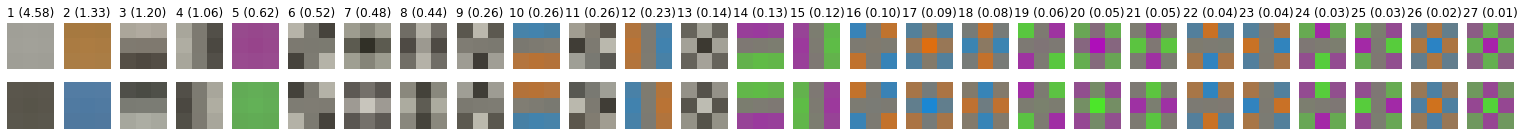

In [ ]:
def cov(X):
    X = X/np.sqrt(X.size(0) - 1)
    return X.t() @ X

def patches(data, patch_size=(3, 3), dtype=torch.float32):
    h, w = patch_size
    c = data.size(1)
    return data.unfold(2,h,1).unfold(3,w,1).transpose(1,3).reshape(-1, c, h, w).to(dtype)

def eigens(patches):
    n,c,h,w = patches.shape
    Σ = cov(patches.reshape(n, c*h*w))
    Λ, V = torch.symeig(Σ, eigenvectors=True)
    return Λ.flip(0), V.t().reshape(c*h*w, c, h, w).flip(0)

Λ, V = eigens(patches(train_set['data'][:10000,:,4:-4,4:-4])) #center crop to remove padding

layout([
    [partial(image_plot, img=V[i].to(torch.float16)*3, title=f'{i+1} ({torch.sqrt(Λ[i]):.2f})') for i in range(len(V))],
    [partial(image_plot, img=-V[i].to(torch.float16)*3, title='') for i in range(len(V))],
], col_width=1.0, row_height=1.0
);

def whitening_block(c_in, c_out, Λ=None, V=None, eps=1e-2):
    filt = nn.Conv2d(3, 27, kernel_size=(3,3), padding=(1,1), bias=False)
    filt.weight.data = (V/torch.sqrt(Λ+eps)[:,None,None,None])
    filt.weight.requires_grad = False 
                                   
    return {
        'whiten': (identity, {'value': filt}),
        'conv': conv(27, c_out, kernel_size=(1, 1), bias=False),
        'norm': batch_norm(c_out), 
        'act':  relu(),
    }

input_whitening_net = network(conv_pool_block=conv_pool_block_pre, prep_block=partial(whitening_block, Λ=Λ, V=V), scale=1/16, types={
    nn.ReLU: partial(nn.CELU, 0.3),
    BatchNorm: partial(GhostBatchNorm, num_splits=16, weight=False)
})

In [ ]:
epochs, batch_size = 100, 512
transforms = (Crop(32, 32), FlipLR(), Cutout(8, 8))
opt_params = {'lr': lr_schedule([0, epochs/5, epochs], [0.0, 0.6, 0.0], batch_size), 'weight_decay': Const(5e-4*batch_size), 'momentum': Const(0.9)}
opt_params_bias = {'lr': lr_schedule([0, epochs/5, epochs], [0.0, 0.6*64, 0.0], batch_size), 'weight_decay': Const(5e-4*batch_size/64), 'momentum': Const(0.9)}

logs = Table(report=every(epochs,'epoch'))
for run in range(N_RUNS):
    model = build_model(input_whitening_net, label_smoothing_loss(0.2))
    is_bias = group_by_key(('bias' in k, v) for k, v in trainable_params(model).items())
    state, timer = {MODEL: model, OPTS: [SGD(is_bias[False], opt_params), SGD(is_bias[True], opt_params_bias)]}, Timer(torch.cuda.synchronize)
    for epoch in range(epochs):
        logs.append(union({'run': run+1, 'epoch': epoch+1}, train_epoch(state, timer, train_batches(batch_size, transforms), valid_batches(batch_size))))
summary(logs)

<ipython-input-74-8d3d9ccb3473>:508: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  res = map_values((lambda xs: to_numpy(torch.cat(xs)).astype(np.float)), group_by_key(logs))


         run        epoch   train time   train loss    train acc   valid time   valid loss    valid acc   total time


<ipython-input-74-8d3d9ccb3473>:426: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  type_ = lambda val: float if isinstance(val, (float, np.float)) else type(val)


           1          100      10.6102       0.8848       0.9971       0.7813       0.9504       0.9612    1065.6518
           2          100      10.6490       0.8852       0.9969       0.7878       0.9494       0.9611    1067.6165
           3          100      10.6421       0.8841       0.9975       0.7692       0.9554       0.9558    1070.6785
           4          100      10.6208       0.8842       0.9975       0.7736       0.9556       0.9555    1069.1491


# **By Changing in Model, following Results are achieved**
#**Train Accuracy: 0.9971**
#**Test Accuracy: 0.9612**